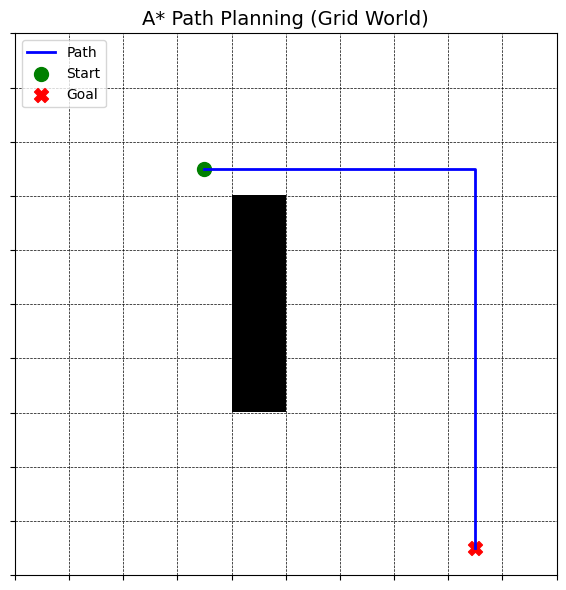

In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

def andajam(a, b):
    # Manhattan heuristic
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def astar_dari(modati, cheyya, jala):
    teravaina = []
    heapq.heappush(teravaina, (0 + andajam(modati, cheyya), 0, modati))
    prayanam_path = {}
    g_dooram = {modati: 0}
    
    while teravaina:
        _, pr_cost, ippudu = heapq.heappop(teravaina)
        if ippudu == cheyya:
            break
        for dx, dy in [(-1,0),(1,0),(0,-1),(0,1)]:
            snehitudu = (ippudu[0] + dx, ippudu[1] + dy)
            if 0 <= snehitudu[0] < len(jala) and 0 <= snehitudu[1] < len(jala[0]):
                if jala[snehitudu[0]][snehitudu[1]] == 1:
                    continue
                new_g = g_dooram[ippudu] + 1
                if snehitudu not in g_dooram or new_g < g_dooram[snehitudu]:
                    g_dooram[snehitudu] = new_g
                    f_mulyam = new_g + andajam(snehitudu, cheyya)
                    heapq.heappush(teravaina, (f_mulyam, new_g, snehitudu))
                    prayanam_path[snehitudu] = ippudu
    
    # Dari reverse cheyadam
    margam = [cheyya]
    while margam[-1] != modati:
        margam.append(prayanam_path[margam[-1]])
    return margam[::-1]

# Grid sadhana mariyu aapagaatham set cheyadam
jala = np.zeros((10, 10))
jala[3:7, 4] = 1  # vertical wall obstacle
modati_s = (2, 3)
cheyya_s = (9, 8)
margam = astar_dari(modati_s, cheyya_s, jala)
margam = np.array(margam)

# Chitram tayaruchesukovadam
fig, aksharalu = plt.subplots(figsize=(6, 6))
aksharalu.imshow(jala, cmap='gray_r')

# Path chupinchadam
aksharalu.plot(margam[:, 1], margam[:, 0], color='blue', linewidth=2, label='Path')
aksharalu.scatter(modati_s[1], modati_s[0], color='green', s=100, label='Start', marker='o')
aksharalu.scatter(cheyya_s[1], cheyya_s[0], color='red', s=100, label='Goal', marker='X')

# Grid settings
aksharalu.set_xticks(np.arange(-0.5, 10, 1))
aksharalu.set_yticks(np.arange(-0.5, 10, 1))
aksharalu.set_xticklabels([])
aksharalu.set_yticklabels([])
aksharalu.grid(color='black', linestyle='--', linewidth=0.5)
aksharalu.set_xlim(-0.5, 9.5)
aksharalu.set_ylim(9.5, -0.5)
aksharalu.set_title("A* Path Planning (Grid World)", fontsize=14)
aksharalu.legend(loc='upper left')

plt.tight_layout()
plt.show()